# MINIMAX ALGORITHM

## PREPARING THE DEVELOPMENT ENVIRONMENT

Including path to previous directory in built-in variable `sys.path`, allowing access to the `tapatan` package:

In [1]:
import sys

sys.path.append('../')

Importing the libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import choice
from IPython.display import clear_output

from tapatan.constants import BLACK, WHITE
from tapatan.logic_game import TapatanGrid
from tapatan.formulations import new_grid,  \
                                 get_moves, \
                                 move, win

Declaring auxiliary functions:

In [3]:
def display_grid(grid):
    return '  -  '.join(map(str, grid[0])) + '\n' + \
           '|  \  |  /  |'                 + '\n' + \
           '  -  '.join(map(str, grid[1])) + '\n' + \
           '|  /  |  \  |'                 + '\n' + \
           '  -  '.join(map(str, grid[2]))

def get_state(grid, user, start, final):
    state = grid.copy()

    state[start] = 0
    state[final] = user

    return state

def evaluate(state):
    """
    Evaluation function:
     - White pieces (Max)
     - Black pieces (Min)
    :params:
    state -> State of the game
    :returns:
    score -> Evaluation of the state
    """
    if win(state, WHITE):
        return +1
    elif win(state, BLACK):
        return -1

    return 0

Testing the evaluation function:

In [4]:
grid_win  = new_grid()
grid_lose = new_grid()
grid_tie  = new_grid()

move(grid_win, BLACK, (0, 0), (0, 1))
move(grid_win, WHITE, (2, 2), (1, 1))
move(grid_win, BLACK, (2, 0), (2, 1))
move(grid_win, WHITE, (1, 0), (2, 0))

move(grid_lose, BLACK, (2, 0), (1, 1))
move(grid_lose, WHITE, (1, 0), (2, 0))
move(grid_lose, BLACK, (0, 0), (1, 0))

In [5]:
print('Expected evaluation = 1')
print('Evaluation obtained =', evaluate(grid_win))
print(display_grid(grid_win))

print()

print('Expected evaluation = -1')
print('Evaluation obtained =', evaluate(grid_lose))
print(display_grid(grid_lose))

print()

print('Expected evaluation = 0')
print('Evaluation obtained =', evaluate(grid_tie))
print(display_grid(grid_tie))

Expected evaluation = 1
Evaluation obtained = 1
0  -  1  -  2
|  \  |  /  |
0  -  2  -  1
|  /  |  \  |
2  -  1  -  0

Expected evaluation = -1
Evaluation obtained = -1
0  -  0  -  2
|  \  |  /  |
1  -  1  -  1
|  /  |  \  |
2  -  0  -  2

Expected evaluation = 0
Evaluation obtained = 0
1  -  0  -  2
|  \  |  /  |
2  -  0  -  1
|  /  |  \  |
1  -  0  -  2


## MINIMAX SEARCH

Creating the minimax algorithm:

In [6]:
def minimax(state, depth):
    return max_value(state, depth)

def max_value(state, depth):
    value = evaluate(state)

    if value or not depth:
        return value, None

    max_eval = float('-inf')
    for move in get_moves(state, WHITE):
        eval, _ = min_value(get_state(state, WHITE, *move), depth-1)

        if eval > max_eval:
            max_eval, max_move = eval, move

    return max_eval, max_move

def min_value(state, depth):
    value = evaluate(state)

    if value or not depth:
        return value, None

    min_eval = float('inf')
    for move in get_moves(state, BLACK):
        eval, _ = max_value(get_state(state, BLACK, *move), depth-1)

        if eval < min_eval:
            min_eval, min_move = eval, move

    return min_eval, min_move

Testing minimax search in different scenarios:

In [7]:
DEPTH = 4

grid1 = np.array([[1, 2, 0],
                  [0, 2, 1],
                  [2, 0, 1]])
grid2 = np.array([[1, 0, 2],
                  [2, 1, 1],
                  [0, 0, 2]])
grid3 = np.array([[2, 1, 0],
                  [0, 2, 1],
                  [0, 2, 1]])

In [8]:
eval, (start, end) = minimax(grid1, DEPTH)

print('Evaluation obtained =', eval)
print(display_grid(grid1))

print()

print('Expected movements:')
print('(0, 1) -> (0, 2)')
print('(2, 0) -> (2, 1)')
print('Movement obtained:')
print(start, '->', end)

Evaluation obtained = 1
1  -  2  -  0
|  \  |  /  |
0  -  2  -  1
|  /  |  \  |
2  -  0  -  1

Expected movements:
(0, 1) -> (0, 2)
(2, 0) -> (2, 1)
Movement obtained:
(0, 1) -> (0, 2)


In [9]:
eval, (start, end) = minimax(grid2, DEPTH)

print('Evaluation obtained =', eval)
print(display_grid(grid2))

print()

print('No expected movements:')
print('(2, 2) -> (2, 1)')
print('Movement obtained:')
print(start, '->', end)

Evaluation obtained = 0
1  -  0  -  2
|  \  |  /  |
2  -  1  -  1
|  /  |  \  |
0  -  0  -  2

No expected movements:
(2, 2) -> (2, 1)
Movement obtained:
(0, 2) -> (0, 1)


In [10]:
eval, (start, end) = minimax(grid3, DEPTH)

print('Evaluation obtained =', eval)
print(display_grid(grid3))

print()

print('Expected movements:')
print('(1, 1) -> (0, 2)')
print('Movement obtained:')
print(start, '->', end)

Evaluation obtained = 0
2  -  1  -  0
|  \  |  /  |
0  -  2  -  1
|  /  |  \  |
0  -  2  -  1

Expected movements:
(1, 1) -> (0, 2)
Movement obtained:
(1, 1) -> (0, 2)


Comparing the minimax search to a random agent and checking the behavior of the search depth parameter:

- The search depths of `2`, `4`, `6` and `8` will be used
- 20 games will be checked for each depth

In [11]:
N = 20
DEPTHS = [2, 4, 6, 8]

wins_random  = 0
wins_minimax = 0
steps = dict()

In [12]:
def random_move(grid, user):
    return choice(get_moves(grid, user))

def play_game(grid, user, depth):
    steps = 0

    while not grid.win(user):
        steps += 1
        user  = BLACK if user == WHITE else WHITE

        if user == BLACK:
            start, final = random_move(grid.grid, user)
        else:
            _, (start, final) = minimax(grid.grid, depth)

        grid.move(user, start, final)

    return steps, user

In [13]:
for depth in DEPTHS:
    stp = 0

    for _ in range(N):
        s, winner = play_game(TapatanGrid(), WHITE, depth)

        stp += s
        if winner == BLACK:
            wins_random  += 1
        else:
            wins_minimax += 1

    steps[depth] = stp / N

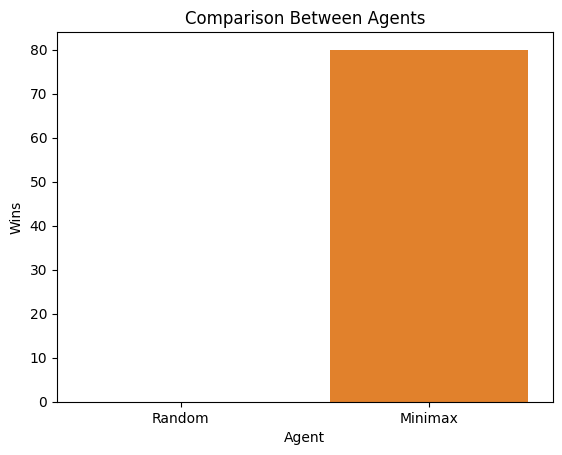

In [14]:
data_wins = pd.DataFrame({'agent' : ['Random', 'Minimax'],
                          'wins'  : [wins_random, wins_minimax]})

sns.barplot(data_wins, x='agent', y='wins')

plt.xlabel('Agent')
plt.ylabel('Wins')
plt.title('Comparison Between Agents')

plt.show()

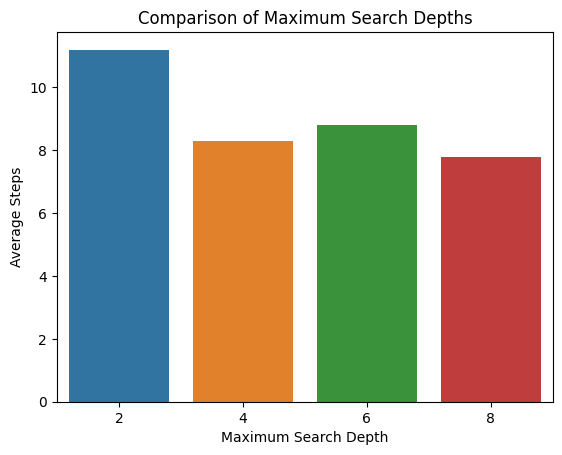

In [15]:
data_depth = pd.DataFrame(steps.items(), columns=['depth', 'steps'])

sns.barplot(data_depth, x='depth', y='steps')

plt.xlabel('Maximum Search Depth')
plt.ylabel('Average Steps')
plt.title('Comparison of Maximum Search Depths')

plt.show()

## GAME PROTOTYPE

Playing a simple prototype of the game:

In [16]:
grid = TapatanGrid()

user = WHITE
while not grid.win(user):
    clear_output()

    print(f'Usuário {user}')
    print(grid)
    print()

    user = BLACK if user == WHITE else WHITE
    if user == BLACK:
        start = tuple(int(c) for c in input(f'Enter the starting position [{user}]='))
        final = tuple(int(c) for c in input(f'Enter the end position      [{user}]='))
    else:
        _, (start, final) = minimax(grid.grid, DEPTH)

    grid.move(user, start, final)

clear_output()

print(f'*** User {user} won the match! ***')
print()
print(grid)

*** User 2 won the match! ***

0  -  1  -  1
|  \  |  /  |
2  -  2  -  2
|  /  |  \  |
0  -  1  -  0
